<a href="https://colab.research.google.com/github/nferrucho/NPL/blob/main/curso2/ciclo4/M5U4_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://drive.google.com/uc?export=view&id=1VV2e_u46fNm_ewns8QW2HGRZAPHh-e2t" alt = "Encabezado MLDS" width = "100%">  </img>

# **Transformers**
----

En este Notebook aprenderemos a trabajar con modelos basados en _Transformers_ utilizando [Hugginface](https://huggingface.co/). Tal como se menciona en el _Módulo 4_ del _Programa de Fonrmación_, Hugginface es una empresa dedicada a la democratización de la inteligencia artificial y el procesamiento de lenguaje natural. Su principal producto es la librería de código abierto con funcionalidades amplias como el uso de modelos pre-entrenados y funciones de **_Machine Learning_ automático** (o auto-ML).

<center><img src="https://drive.google.com/uc?export=view&id=1hqBNDmIkGAq8Z-6-UuKhBGEwj0--ORdg" alt ="Icono de Transformers utilizando Hugginface "width="60%"></center>

Con *_Hugginface_* podemos automatizar diferentes tareas como:

*    Análisis de sentimientos.
*    Generación de respuestas.
*    Reconocimiento de entidades nombradas.
*    Traducción.

En este notebook veremos:

* Cómo funciona un _Transformer_.
* Cómo usar modelos pre-entrenados de _Huggingface_ para resolver problemas con conjuntos de datos propios.

Primero tenemos que realizar la instalación de las librerías que necesitamos, dado que estas no vienen instaladas por defecto en el entorno de Colab.


In [ ]:
!pip install --upgrade transformers
!pip install tf-keras
!pip install datasets
!pip install sentencepiece

In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1' # Establece la versión legacy

# **¿Qué es un _Transformer_?** ("Attention is all you need")
----

Los _Transformers_ son **arquitecturas diseñadas para el procesamiento secuencial de información**. Son redes neuronales profundas que sustituyen a las CNN y RNN usando mecanismos de auto-atención, o _self attention_.

La idea detrás de la auto-atención es que cada elemento en la secuencia de entrada puede afectar a cualquier otro elemento en la secuencia, lo permite aprender la dependencia entre los elementos.

Si bien, los _Transformers_ nacieron como una alternativa para solucionar el problema de memoria sostenida, hoy en día han revolucionado el campo del NLP y se han convertido en la base para muchos modelos de vanguardia como BERT, GPT, T5, entre otros.

<center><img src="https://drive.google.com/uc?export=view&id=17nSmlq0EkNTKD8UA2CZyYRmhYSiAQ0LB" alt ="Gráfico ilustrativo de la arquitectura de un Transformer" width="33%"></center>


Esta arquitectura fue propuesta por **Ashish Vaswani**, en su publicación *_attention is all you need_*, la cual pueden consultar en el siguiente enlace : [**_Attention is all you need_**](https://arxiv.org/abs/1706.03762)


* Al igual que todos los modelos de aprendizaje profundo, una buena parte de los modelos basados en _Transformers_ busca **aprender una buena representación de las entradas** (textos en este caso) dependiendo de cuál sea la tarea final.

El mecanismo de auto-atención codifica no solo los caracteres y palabras de los textos, sino además **la posición** de estos en el texto, y de esta forma puede rastrear en qué parte del texto suceden cosas importantes e  identificar cuales necesitan más atención.



# **1. El funcionamiento de un _Transformer_**
----

Cuando se presentaron por primera vez los _Transformers_, se mostraron como un modelo de traducción de texto. Para esto, el modelo usa dos sub-estructuras:

* Una primera parte llamada codificador o _encoder_.
* Una segunda parte llamada decodificador o _decoder_.

Si bien hablaremos más a profundidad sobre estas arquitecturas en la próxima unidad, podemos considerar unas ideas rápidas para orientarnos sobre cómo funcionan los _Transformers_.

<center><img src="https://drive.google.com/uc?export=view&id=11a3mgpcKWLNYy2rwn0eBysMeQsqQPOGC" alt ="Gráfico ilustrativo de la arquitectura de un transformer de manera general" width="32%" /></center>

## **Componentes**

Un _Transformer_ puede verse como la unión de un codificador y un decodificador:


*   **_Encoder_** (codificador): Como su nombre lo indica, esta sección del modelo se encarga de **convertir los datos de entrada** hacia una representación numérica. Esta codificación no es más que un aprendizaje de representación, que también sucede, aunque de forma muy diferente, en otros modelos como las redes neuronales convolucionales.

*   **_Decoder_** (decodificador): Como su nombre lo indica, esta sección del modelo **toma la codificación que generó el _encoder_ y la transforma** dependiendo de cuál es la tarea objetivo. Por ejemplo, si el objetivo es hacer traducción, el _decoder_ transforma la codificación que el _encoder_ hizo, en una frase legible en el idioma objetivo.

Si miramos más en detalle, cada sección contiene a su vez muchas estructuras que son modificables dependiendo de cada modelo y cada tarea específica:

<center><img src="https://drive.google.com/uc?export=view&id=17nSmlq0EkNTKD8UA2CZyYRmhYSiAQ0LB" alt ="Gráfico ilustrativo de la arquitectura de un Transformer" width="33%"></center>

*    _Multi-head attention_ o atención de múltiples cabezas: Es una técnica que permite al modelo centrarse en diferentes partes de la secuencia simultáneamente. Se compone de varias "cabezas" de atención que funcionan en paralelo, cada una de las cuales aprende diferentes patrones de atención. La atención se calcula utilizando tres conjuntos de vectores: consultas (queries), claves (keys) y valores (values), que se obtienen a partir de las representaciones de entrada.

*    _Feed Forward_ o Redes neuronales de avance: Las redes neuronales de avance en cada capa del codificador y decodificador son responsables de aprender representaciones más abstractas y no lineales de la secuencia de entrada.

*    _Positional Encoding_ o codificación posicional: Dado que la arquitectura _Transformer_ no tiene información implícita de la posición de las palabras en la secuencia, se utiliza un _encoding_ posicional para proporcionar información sobre la posición de las palabras en la secuencia. Esta información se suma a las representaciones de entrada antes de alimentarlas al codificador y decodificador.

No toda tarea requiere de un _encoder_ y un _decoder_. Por ejemplo, si queremos hacer clasificación de texto, lo que necesitamos es usar la representación generada por el _encoder_ y usar eso como entrada a un perceptrón multicapa (o a un SVM, o a un árbol de decisión, etc). La tarea de generación de texto, en cambio, si requiere la capacidad generativa del _decoder_ para devolver un texto legible.

## **_Pipeline_ de ejecución**

Si bien los _Transformers_ permiten realizar varias tareas, no actúan solos. Al igual que otras arquitecturas, son parte de un _pipline_ de ejecución más grande, que incluye un proceso de tokenización y un post-procesamiento:

<center><img src="https://drive.google.com/uc?export=view&id=1yaxcm5ceXkGuMZ5u6iQaZ0sGyYXGU3Pu" alt ="Gráfico ilustrativo de la pipeline de ejecución" width="80%" /></center>

Para poder utilizar los modelos pre entrenados, debemos considerar entonces las otras etapas del _pipeline_ aparte del modelo porque también deben ser replicadas.
* Al igual que hace con los diferentes modelos _Hugginface_, podemos descargarlas y utilizarlas de forma independiente.

A continuación, vamos a ver cómo usarlas:

## **1.1 Tokenizers**
----
La **tokenización** es el proceso inicial de representación numérica del texto. Es una parte crucial del desarrollo modelos, pues sin esto resultaría imposible el procesamiento de la información. Existen diferentes métodos para tokenizar, por ejemplo:

* **Tokenización basada en palabras**, asigna un token específico a cada palabra del texto, bien sea separándolo por espacios en blanco, o por signos de puntuación.

<center><img src="https://drive.google.com/uc?export=view&id=1XUFHGKJj_4FhxvDsSUmrhgE0s-AvHD1P" alt ="Gráfico ilustrativo de la tokenización basada en palabras" width="90%" /></center>

* **Tokenización basada en caracteres**, asigna un token específico a cada carácter.

<center><img src="https://drive.google.com/uc?export=view&id=1xTGdCl-PG-J4W4h1sQ7mO0btF5dZvJOq" alt ="Gráfico ilustrativo de la tokenización basada en caracteres" width="90%" /></center>

* **Tokenización basada en estructuras**, asigna un token específico a estructuras gramaticales, como por ejemplo prefijos o sufijos:

<center><img src="https://drive.google.com/uc?export=view&id=1eew0wJpwPQohwd0XfB5Q1mBoK1yAFuSp" alt ="Gráfico ilustrativo de la tokenización basada en estructuras" width="90%" /></center>

Veamos entonces cómo usar un `tokenizer` de _Hugginface_. La librería ofrece una amplia variedad de tokenizers que permiten:

*   **Entrenar nuevos vocabularios y tokenizar**, usando los tokenizadores más usados hoy en día.
*   **Hacer seguimiento**. Siempre es posible obtener la parte de la frase original que corresponde a cualquier token.
*   **Realizar todo el preprocesamiento**: Operaciones de truncado, relleno, añadir los tokens especiales que necesite el modelo, etc.

Cada tokenizer en sí mismo trabaja como un _pipeline_ de ejecución que incluye los siguientes pasos:

*  El `Normalizer`: Se encarga de normalizar el texto, es decir, en convertir el texto en una forma más uniforme y estandarizada, convirtiendo mayúsculas en minúsculas, quitando signos de puntuación y caracteres especiales, convirtiendo las palabras a su lema o forma canónica (lematización), etc.
*    El `PreTokenizer`: Se encarga de crear divisiones iniciales de palabras en el texto. La forma más común de dividir el texto es simplemente en los espacios en blanco.
*    El `Model`: Se encarga de realizar la tokenización propiamente dicha.
*    El `PostProcessor`: Se encarga de postprocesar la codificación para añadir cualquier cosa relevante que, por ejemplo, necesite un modelo lingüístico, como tokens especiales.




### **1.1.1 `AutoTokenizer`**
---
La función `AutoTokenizer` de la biblioteca `Transformers` es una herramienta que nos permite instanciar automáticamente un tokenizer específico para un modelo de lenguaje determinado.  A continuación, a manera ilustrativa vamos a usar la función `AutoTokenizer` para cargar un tokenizer usado en un modelo de análisis de sentimientos: [bert-base-multilingual-uncased-sentiment](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment). Lo cargamos usando la función `.from_pretrained()`, que acepta un argumento `pretrained_model_name_or_path`, que a su vez especifica el nombre o la ruta del modelo preentrenado para el que se quiere obtener el tokenizer.

In [ ]:
from transformers import AutoTokenizer

checkpoint = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=checkpoint)

Una vez cargado nuestro `tokenizer`, podemos usarlo para tokenizar un texto **secuencia**, por ejemplo: `"Usar redes neuronales es muy divertido"`:

In [ ]:
print(tokenizer("Usar redes neuronales es muy divertido"))
print(type(tokenizer("Usar redes neuronales es muy divertido")))

Lo que vemos es que `tokenizer` devuelve un objeto tipo `transformers.tokenization_utils_base.BatchEncoding`, parecido a un diccionario con tres llaves :

*   `input_ids`: Una lista de enteros con los índices del token correspondiente a cada elemento de la secuencia de entrada.
*   `token_type_ids`: Una lista de enteros que indican a cuál secuencia pertenece el token. Como en este ejemplo solo hay una secuencia, entonces solo hay un índice `0` para todos.
*   `attention_mask`: La máscara de atención es un tensor binario que indica la posición de los índices de relleno para que el modelo no les preste atención. 1 indica un valor que debe ser atendido, mientras que 0 indica un valor de relleno.

### **1.1.2 Parámetros**
---

Al igual que en los procesos de preprocesamiento de imágenes, en aplicaciones de texto debemos estandarizar algunos parámetros como, por ejemplo, la longitud de las secuencia de entrada del modelo.

Digamos que nuestros datos se componen de textos que pueden tener una longitud máxima de 10 tokens, es decir, que cada texto se representa por medio de un vector de 10 dimensiones y que por tanto el tamaño de entrada del modelo es de 10. ¿Qué pasa si un texto se compone de menos de 10 tokens? Por ejemplo: `Deep Learning` tiene solo dos palabras, y su representación usaría dos tokens. En este caso hay que "rellenar" la secuencia. En esta operación de relleno, o _padding_, se agrega un token especial al final de la secuencia hasta que se alcance la longitud máxima deseada. El token de _padding_ puede ser diferente dependiendo del modelo de lenguaje y del tokenizer utilizado, pero generalmente es el mismo token que se utiliza para indicar el final de una secuencia (en BERT, por ejemplo, se llama `[SEP]`).

Estos parámetros los podemos controlar con la función `tokenizer`. Los argumentos que acepta esta función dependen del tokenizer que se esté utilizando, pero en general, estos son algunos de los argumentos más comunes que se utilizan:

* `text`: La secuencia de texto sin procesar que se desea tokenizar.
* `add_special_tokens`: Un valor booleano que indica si se deben agregar tokens especiales al principio y al final de la secuencia de tokens resultante. Estos tokens especiales se utilizan en algunos modelos de lenguaje para indicar el inicio y el final de la secuencia, y para separar varias secuencias cuando se procesan en lotes.
* `max_length`: La longitud máxima deseada para la secuencia de tokens resultante después de agregar padding y/o truncar la secuencia. Si no se especifica un valor para `max_length`, no se aplicará padding ni truncamiento a la secuencia.
* `padding`: Un valor booleano o una cadena que indica si se debe aplicar padding a la secuencia de tokens. Si se especifica un valor booleano, se aplicará padding al final de la secuencia hasta que alcance la longitud máxima especificada. Si se especifica una cadena, el valor puede ser `longest`, `max_length`, o `do_not_pad`, para indicar cómo se debe aplicar el padding.
* `truncation`: Un valor booleano que indica si se debe truncar la secuencia de tokens si es más larga que la longitud máxima especificada. Si se establece en `True`, se truncará la secuencia al final para que tenga la longitud máxima especificada. Si se establece en `False`, se devolverá la secuencia completa sin truncamiento.
* `return_tensors`: Un valor de cadena que indica el formato en que se deben devolver los tokens. Puede ser `pt` para devolver un tensor de _PyTorch_, `tf` para devolver un tensor de _TensorFlow_, o `np` para devolver una matriz NumPy. Si no se especifica un valor para return_tensors, se devolverán los tokens como una lista de Python.

Es importante tener en cuenta que no todos los argumentos están disponibles para todos los tokenizers. Además, algunos tokenizers pueden tener argumentos adicionales que no se mencionan aquí. Por lo tanto, siempre es recomendable consultar la documentación oficial del tokenizer que se esté utilizando para obtener una lista completa de los argumentos y su descripción.


### **1.1.3 Métodos**
---

Los _tokenizers_ tienen varios métodos útiles que se pueden utilizar para realizar diferentes tareas:

* `tokenizer.tokenize(texto)`: Este método toma un texto sin procesar como entrada y devuelve una lista de tokens. Por ejemplo, si usamos el tokenizer de BERT para tokenizar la oración `Hello, how are you?`, obtendrás los tokens `["hello", ",", "how", "are", "you", "?"]`.

* `tokenizer.encode(texto, add_special_tokens=True)`: Este método toma un texto sin procesar como entrada y devuelve una lista de códigos de token. Cada código de token corresponde a un token en el vocabulario del modelo. Si se establece el parámetro add_special_tokens en `True`, se agregan los tokens especiales necesarios para que el modelo procese correctamente la entrada (en BERT, serían el token `[CLS]` para el inicio de la secuencia y `[SEP]` para separar varias secuencias).

* `tokenizer.decode(codigos)`: Este método toma una lista de códigos de token como entrada y devuelve una cadena de texto que representa la secuencia de tokens correspondiente. Si los códigos de token provienen de un modelo que agrega tokens especiales, como BERT, los tokens especiales se eliminan automáticamente de la cadena de salida.

* `tokenizer.encode_plus(texto, text_pair=None, ... )`: Este método toma una secuencia de texto (y una secuencia de texto adicional, si es necesario) y devuelve una diccionario que contiene los tokens codificados, las máscaras de atención y otros elementos necesarios para la entrada de un modelo de lenguaje.

* `tokenizer.convert_tokens_to_ids(tokens)`: Este método toma una lista de tokens como entrada y devuelve una lista de códigos de token que corresponden a cada token en la lista de entrada.

Veamos algunos ejemplos. Podemos obtener los tokens de un texto:

In [ ]:
tokens = tokenizer.tokenize("Usar redes neuronales es muy divertido")

print(tokens)

Podemos ver solo los índices de los tokens con la función:

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

O podemos retornar las palabras correspondientes a una lista de índices:

In [ ]:
decoded_string = tokenizer.decode([26859, 42962, 13468, 38481, 11300, 10153, 13653, 78000, 26538, 10351])
print(decoded_string)

Ahora veamos el efecto de cambiar ciertos parámetros. Definiremos un texto de ejemplo con 10 palabras. Luego, especificamos que queremos una longitud máxima de 20 tokens utilizando el argumento `max_length`.

Para asegurarnos de que la secuencia resultante tenga una longitud de 20, especificamos `padding='max_length'`. Además, para asegurarnos de que la secuencia de entrada se trunque si es más larga que 20 tokens, establecemos `truncation=True`. También especificamos que queremos que se devuelvan las máscaras de atención de la entrada utilizando el argumento `return_attention_mask=True`.

Finalmente, utilizamos el argumento return_tensors="np" para especificar que queremos que los resultados se devuelvan como arrays de Numpy.

In [ ]:
text = "Este es un texto de ejemplo con 10 palabras."
max_length = 20

# Tokenizar y agregar padding
tokenizer.encode_plus(
    text,
    max_length=max_length,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors="np"
)

Note que el tokenizador rellenó con `0` los índices de los tokens de lleneno, y que en  `attention_mask` estos tokens están indicados también con el número `0`.

## **1.2 Modelos**
----
Al igual que con los tokenizers, podemos llamar modelos de forma independiente. Hay muchas opciones de modelos pre-entrenados que se pueden consultar en el [Hub](https://huggingface.co/models) de modelos de _Hugginface_. No obstante, _Hugginface_ nos permite trabajar con modelos genéricos usando la clase `AutoModel`, que permite utilizar diferentes llamados que hacen alusión a la salida esperada de acuerdo con la tarea que deseamos resolver, por ejemplo :

* ForCausalLM
* ForMaskedLM
* ForMultipleChoice
* ForQuestionAnswering
* ForSequenceClassification
* ForTokenClassification

De esta manera, al definir por ejemplo un modelo a partir de la clase
`TFAutoModelForSequenceClassification`
lo que obtenemos es un modelo genérico en _Tensorflow_ para clasificación que se inicializará después con ayuda del método `from_pretrained`.


### **1.2.1 Ejemplo: Análisis de sentimientos**
---

A continuación, usaremos un modelo pre-entrenado para hacer análisis de sentimientos en español, sobre el que puede consultar más detalles en https://huggingface.co/pysentimiento/robertuito-sentiment-analysis.

El modelo ha sido entrenado con un corpus de alrededor de 5000 tweets, y predice tres etiquetas posibles:  NEGATIVO, NEUTRO y POSITIVO. El nombre del modelo es: `"pysentimiento/robertuito-sentiment-analysis"`. Esto nos sirve para definir tanto el modelo como el tokenizador:

In [ ]:
from transformers import TFAutoModelForSequenceClassification
import numpy as np

checkpoint = "pysentimiento/robertuito-sentiment-analysis"
#Definimos el tokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
#Definimos el modelo
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)

Con el modelo cargado, vamos a analizar el sentimiento de la secuencia siguiente :

In [ ]:
#Definimos una secuencia de ejemplo
sequence = "Usar redes neuronales es muy divertido"

Codificamos la secuencia con el `tokenizer`, y nos quedamos solo con los `input_ids`. Note que en el `tokenizer` usamos el argumento `return_tensor`, que nos permite controlar el tipo de variable que retorna el `tokenizer`:

In [ ]:
#Codificamos la secuencia
cod = tokenizer(sequence, return_tensors='tf')['input_ids']
print(cod)

Y ahora podemos pasar la secuencia codificada al modelo para predecir a cuál sentimiento corresponde:

In [ ]:
output = model(cod)
print(output)

La salida del modelo es `[[-3.1336043 ,  0.66872346,  3.285456  ]]`. Necesitamos entonces hacer un paso más para obtener una interpretación concreta:

## **1.3 Post-procesamiento**
---
De acuerdo con la salida esperada, generamos un postprocesamiento adecuado que nos permita entender la salida del modelo. `output.logits` nos retorna el tensor de las predicciones :



In [ ]:
output.logits

Y debemos usar la función _softmax_ sobre la salida `output.logits`. Para esto podemos usar cualquier herramienta, por ejemplo `numpy` o `Tensorflow`. En este caso usamos `tf.math.softmax()`:

In [ ]:
import tensorflow as tf

print(tf.math.softmax(output.logits))

El resultado muestra la probabilidad de las tres clases 0:NEGATIVO, 1:NEUTRO, 2:POSITIVO. La clase 2 es la que obtiene una probabilidad más alta, De esta manera tenemos que el modelo está prediciendo que la secuencia tiene un sentimiento **POSITIVO**.

## **1.4 Pipelines**
---

Huggingface provee un mecanismo, llamado *pipelines* que permite automatizar los pasos de tokenización, aplicación del modelo y postprocesamiento. A continuación veremos un ejemplo del uso de un pipeline para la tarea de respuesta de preguntas, en Inglés *question answering*. Esto se lleva a cabo con la función `pipeline` la cual recibe el nombre de la tarea, el modelo y el tokenizer. El modelo que vamos a usar es un modelo pequeño basado en Bert afinado para la tarea de respuesta de preguntas en dominio cerrado. En esta tarea se da un contexto y una pregunta y el modelo retorna la respuesta que corresponde a una subcadena del contexto.

In [ ]:
from transformers import TFAutoModelForQuestionAnswering
from transformers import pipeline

checkpoint = "Sebastian77/distilbert-base-uncased-finetuned-squad_es"
#Definimos el tokenizer
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
#Definimos el modelo
model = TFAutoModelForQuestionAnswering.from_pretrained(checkpoint)
qa_pipeline = pipeline('question-answering',
                            model = model,
                            tokenizer = tokenizer)

A continuación usamos el pipeline para responder dos preguntas. La función `qa_pipeline` recibe tanto el contexto y la pregunta y retorna la respuesta indicando el score que le asigna a la respuesta y la posición dentro del contexto.

In [ ]:
#Especificamos el contexto
context = '''
Colombia, oficialmente República de Colombia, es un país soberano situado en la
región noroccidental de América del Sur. Se constituye en un Estado unitario,
social y democrático de derecho cuya forma de gobierno es presidencialista con
dos cámaras legislativas. Su capital y ciudad más poblada es Bogotá.​ Es una
república organizada políticamente en treinta y dos departamentos
descentralizados y el Distrito Capital de Bogotá,13​ sede del Gobierno nacional.
'''
question1 = "Cuál es la capital de Colombia?"
question2 = "Dónde está situado Colombia?"
print(qa_pipeline(context=context, question=question1))
print(qa_pipeline(context=context, question=question2))

# **2. _Fine Tuning_ con BERT**
----

Al igual que con los modelos pre-entrenados de redes neuronales convolucionales para detección de objetos en imágenes, con los modelos de _Transformers_ podemos hacer un ajuste fino o _Fine-tuning_ usando un dataset particular para alguna tarea más específica. El principio de cómo funciona, y los pasos a seguir, son exactamente iguales a lo que se hacen con las CNN's:

1.   Se carga un modelo base originalmente pre-entrenado para una tarea general.
2.   Si es necesario, sobre el modelo base se añaden capas de procesamiento específicas para la nueva tarea objetivo.
3.   Se congelan los pesos del modelo base y se entrenan las capas añadidas usando el nuevo conjunto de datos durante unas cuantas _epochs_.
4.   Se liberan todos los pesos del modelo y se sigue entrenando, usando un _learning rate_ pequeño.

Veamos entonces cómo hacer esto con los modelos de la librería _Hugginface_.

Primero, como ejemplo, vamos a cargar el conjunto de datos **CoLA**, usando el paquete `datasets`. Esta es una biblioteca de _Python_ desarrollada por _HuggingFace_ que ofrece:

*    Amplia colección de conjuntos de datos: incluye una gran cantidad de conjuntos de datos populares para tareas de NLP, como clasificación de texto, resumen, traducción automática, respuesta a preguntas, análisis de sentimiento, etc. Algunos ejemplos de conjuntos de datos incluidos son SQuAD, GLUE, SuperGLUE, y WMT.

*    Carga de datos eficiente: `datasets` utiliza Apache Arrow, un formato de datos en columna, para almacenar y cargar datos de manera eficiente en términos de tiempo y memoria. Esto permite trabajar con conjuntos de datos grandes sin preocuparse por el rendimiento.

*     Procesamiento de datos: `datasets` proporciona funciones para aplicar fácilmente operaciones de preprocesamiento, como la tokenización, filtrado, muestreo, división y otros procesos necesarios antes de utilizar los datos en modelos de NLP.

*     Interoperabilidad: `datasets` es compatible con diferentes bibliotecas de aprendizaje automático y NLP, como TensorFlow, PyTorch, y spaCy, lo que facilita la integración con diferentes flujos de trabajo y herramientas existentes.

Llamamos a la función `load_datasets` y cargamos **CoLA**:



In [ ]:
from datasets import load_dataset

dataset = load_dataset("glue", "cola")
dataset_train = dataset["train"] # Cargamos la partición de prueba

**CoLA**, o _Corpus of Linguistic Acceptability_ consta de 10657 frases de 23 publicaciones lingüísticas, anotadas por expertos en aceptabilidad (gramaticalidad) por sus autores originales. La versión pública contiene 9594 frases pertenecientes a los conjuntos de entrenamiento y validación, y excluye 1063 frases pertenecientes a un conjunto de prueba.

Podemos dar un vistazo de los datasets usando el atributo `.data`:

In [ ]:
dataset_train.data

La tarea entonces es de **clasificación binaria**. El modelo debe decidir si una oración es gramáticamente correcta o no. Ahora discutamos un poco sobre el modelo que vamos a usar.

##  **Selección del modelo pre-entrenado**

Si bien podemos usar `AutoModel` para definir nuestro modelo, también es bueno conocer más en detalle el panorama general de los modelos pre-entrenados que tenemos a disposición. Desde la presentación del _Transformer_ original (o _Vanilla Transformer_), que está pensado para tareas de traducción, han surgido variaciones y familias completas de modelos:

<center><img src="https://drive.google.com/uc?export=view&id=14qol6GZRgGZ92xZBBMX0dQtSlqiAmapT" alt ="Attention heatmap" width="70%" /></center>

Veamos algunos detalles :

*   **BERT**: Pre-entrenado para NSP (_Next Sentence Prediction_) y MLM (_Masked Language Modeling_) y con aplicaciones en GLU (_General Language Understanding_), QA (_Question Answering_) y muchas otras más. La versión _Base_ del modelo tiene 110 millones de parámetros y la versión _Large_ 340 millones.
*   **GPT**: Pre-entrenado para LM (_Language Modeling_) y con aplicaciones en generación de texto y muchas otras con el ajuste fino adecuado. El modelo tiene 117 millones de parámetros.
*   **ViT**: Es una extensión de BERT pensada para hacer análisis de imagen basado en parches. Tiene 86 millones de parámetros.
*   **TransformerXL**: Pre-entrenado para LM (_Language Modeling_) y con aplicaciones en tareas generales de lenguaje. Es un modelo con un mecanismo de atención que permite capturar relaciones en contextos más largos que el _Vanilla Transformer_. Tiene 151 millones de parámetros.

Como el catálogo es tan extenso, no podemos ver aquí todos los detalles, pero [aquí](https://docs.google.com/spreadsheets/d/1ltyrAB6BL29cOv2fSpNQnnq2vbX8UrHl47d7FkIf6t4/edit#gid=0) puede encontrar una tabla mucho más completa.

De nuevo, la escogencia del modelo para nuestra tarea va a ser el resultado de una negociación y un balance entre los requerimientos y limitaciones computacionales, la tarea específica y el conjunto de datos que tengamos disponible, y el desempeño que pretendamos obtener.

### **BERT**
----
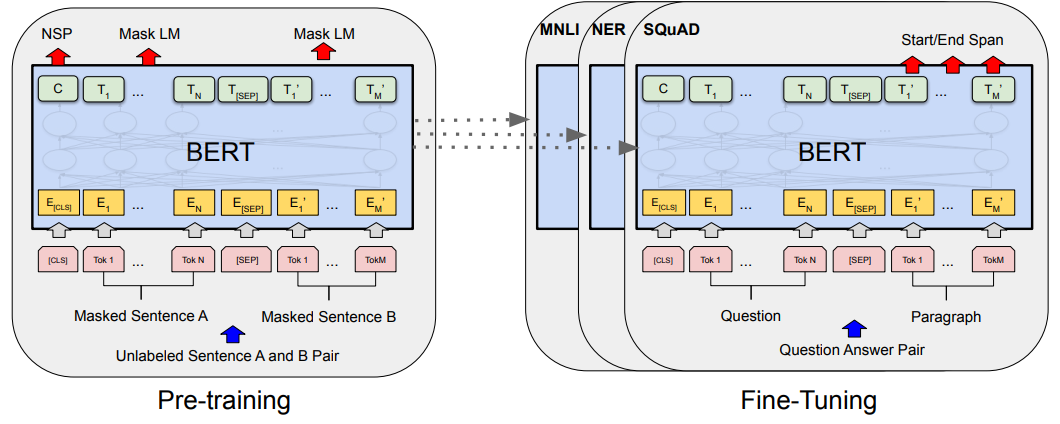
Para nuestro ejemplo a continuación vamos a usar **BERT** (Bidirectional Encoder Representations from Transformers). [BERT fue desarrollado por Google en 2018](https://arxiv.org/abs/1810.04805). El modelo es bidireccional, lo que significa que puede procesar y comprender el contexto de la oración en ambas direcciones: de izquierda a derecha y de derecha a izquierda.

El modelo fue entrenado en un corpus de datos masivo utilizando una técnica de pre-entrenamiento llamada "masked language modeling" (MLM) y otra técnica llamada "next sentence prediction" (NSP).

En la técnica de MLM, se oculta una parte de la oración y el modelo debe adivinar qué palabra faltante debe ir en ese espacio en blanco. Esto obliga al modelo a aprender a comprender el contexto y el significado de las palabras en una oración. En la técnica de NSP, se proporcionan dos oraciones al modelo, y el modelo debe determinar si la segunda oración sigue o no a la primera. Esto ayuda al modelo a aprender a comprender la relación entre dos oraciones y capturar el contexto más amplio del texto.

BERT se entrenó en una variedad de conjuntos de datos masivos, incluidos los conjuntos de datos de Wikipedia y el libro de Google Books. En total los datos contenian más de 3.3 mil millones de palabras en inglés.




## **2.1 Tokenización**
---

En su versión básica podemos cargar BERT con `"bert-base-cased"`. A continuación, cargamos un tokenizador con `AutoTokenizer` y tokenizamos los datos como matrices _NumPy_. Note que `dataset` tiene varios `keys`. Las oraciones con las que se entrena el modelo están en la key `sentence` y las etiquetas están en la key `label`.

Las etiquetas ya son una lista de 0 y 1, así que podemos convertirlas directamente en una matriz _NumPy_ sin tokenización.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenized_data_train = tokenizer(dataset_train["sentence"], return_tensors="np", padding=True)

labels_train = tf.keras.utils.to_categorical(np.array(dataset_train["label"]))

Note también que no definimos la longitud de secuencuia máxima. Para BERT, esta está definida por defecto en 512.

Ahora, `tokenized_data_train` contiene los datos tokenizados con el `tokenizer`. Como vimos antes, estos datos se almacenan como un objeto de tipo `BatchEncoding`:

In [ ]:
type(tokenized_data_train)

El cual es un objeto muy parecido a un diccionario:

In [ ]:
print(tokenized_data_train)

### **Token `[CLS]`**
---
El token `[CLS]` (abreviatura de "classification") es un token especial que se agrega al comienzo de cada secuencia de entrada en BERT y se utiliza en el proceso de fine-tuning para clasificación de texto. Este token se utiliza para representar la oración completa y se procesa de manera especial por el modelo.

Durante la fase de fine-tuning, el modelo de BERT utiliza la representación del token `[CLS]` para realizar la tarea de clasificación de texto. En particular, la salida del modelo de BERT se toma a partir de la representación del token `[CLS]` y se utiliza como entrada para un clasificador adicional que se entrena para la tarea específica de clasificación de texto.

La representación del token `[CLS]` se entrena durante el proceso de pre-entrenamiento de BERT para capturar información semántica y sintáctica de la secuencia de entrada y se utiliza durante el fine-tuning para ayudar al modelo a producir una clasificación más precisa.

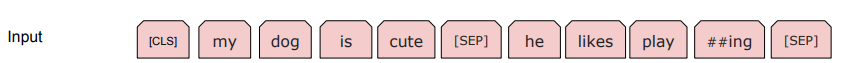

Todo el proceso relacionado con el token `[CLS]` sucede de forma automática, así que en ningún momento vamos a ser muy explícitos en el código al respecto, pero es importante conocer estos detalles del modelo en caso de querer abordar aplicaciones más complejas.

## **2.2 Modelo**
---
Ahora cargamos y compilamos el modelo. Usamos `TFAutoModelForSequenceClassification` para ser explícitos con que vamos a trabajar con un modelo de _Tensorflow_.

In [ ]:
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Definimos y cargamos el modelo
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased")

Antes de seguir, veamos la arquitectura del modelo con `.summary()`:

In [ ]:
model.summary()

Note que tenemos tres secciones:



1.   El modelo BERT.
2.   Una capa de _dropout_.
3.   Una capa densa de neuronas.

Es decir, este es un modelo que codifica las oraciones usando el modelo de BERT, y hace la clasificación final con una capa densa.

Veamos en detalle la configuración de esta última capa densa: `model.layers` retorna las capas del modelo, y como nos interesa la última, usamos la indexación `[-1]`, y a esa capa le aplicamos `.get_config()`, función que retorna un diccionario con todas las especificaciones de la capa.




In [ ]:
model.layers[-1].get_config()

Podemos ver que es una capa de dos neuronas (`'units': 2`), que es justo lo que necesitamos para la clasificación binaria que vamos a hacer. Además, note que la activación es `linear`, es decir, la salida de las neuronas no se procesan por una función `softmax`.

> **Nota:** si tuvieramos más de dos clases, usaríamos el argumento `num_labels`. Por ejemplo, para tres clases sería:
```
TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)
```

## **2.3 Calentamiento**
---
Primero hacemos un calentamiento de la capa de clasificación. Congelamos el modelo BERT y compilamos el modelo definiendo `Adam` como optimizador. Como tenemos dos neuronas de salida, usamos `CategoricalCrossentropy`. Además usamos una tasa de aprendizaje de `5e-6`.

> **Nota 1**: Recuerde que la escogencia de los hiperparámetros del modelo es algo que debe ser explorado cuidadosamente.

> **Nota 2**: Como no hay una función `softmax` en la salida del modelo, debemos definir `from_logits=True` en la función de pérdida.


In [ ]:
# Compilamos el modelo
model.compile(optimizer=Adam(learning_rate=5e-6),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True))

# Congelamos las capas del modelo BERT
for i in range(len(model.layers)-1):
  model.layers[i].trainable = False

model.summary()

Note que tenemos solo 1,538 parámetros para entrenar. Como vimos en la Unidad 2, con la función `.fit()` podemos definir usar una porción del conjunto de entrenamiento para validación, con el argumento `validation_split`, y también podemos definir un _Callback_ tipo `EarlyStopping` para detener el entrenamiento si después de ciertas _epochs_ la función de pérdida en validación no mejora.

Note también que en `.fit()` convertimos los datos `tokenized_data_train` en un diccionario. _Keras_ reconoce objetos `dict` pero no el `BatchEncoding` devuelto por el `tokenizer`, a pesar de que `BatchEncoding` es una subclase de `dict`.

In [ ]:
model.get_compile_config()

In [ ]:
#Definimos un callback
stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                patience=5,
                mode="min",
                restore_best_weights=True
            )
# Entrenamos
history = model.fit(dict(tokenized_data_train),
                    labels_train,
                    epochs = 10,            # Entrenamos por pocas epochs
                    batch_size=32,
                    validation_split = 0.2, # Usamos el 20% del dataset como conjunto de validación
                    callbacks=[stopping])

Y siempre es bueno mirar las curvas de entrenamiento:

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.plot(history.history["loss"])
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.style.use("ggplot")
plt.plot(history.history["val_loss"])
plt.title("Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## **2.4 Ajuste Fino**
---
Ahora vamos a entrenar todo el modelo ajustándolo un poco más a partir de los pesos obtenidos con el calentamiento. Volvemos entrenables las capas que estaban congeladas:


In [ ]:
for i in range(len(model.layers)-1):
  model.layers[i].trainable = True

Y compilamos de nuevo usando esta vez una tasa de aprendizaje mucho más baja (`1e-9`):

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-7),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True))

model.summary()

En este momento tenemos 108'311.810 parámetros para entrenar. Como todo el tiempo hemos manipulado el mismo modelo `model`, no necesitamos guardar los pesos del calentamiento y volverlos a cargar; de eso se ha encargado `tf.keras.callbacks.EarlyStopping` ya que definimos `restore_best_weights=True`. A continuación de nuevo usamos un `EarlyStopping` y entrenamos con la función `fit()`:

In [ ]:
#Definimos un callback
stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                patience=5,
                mode="min",
                restore_best_weights=True
            )
# Entrenamos
history = model.fit(dict(tokenized_data_train),
                    labels_train,
                    epochs = 50,
                    batch_size=32,
                    validation_split = 0.2, # Usamos el 20% del dataset como conjunto de validación
                    callbacks=[stopping])

## **2.5 Evaluación**
---
Una vez entrenado el modelo, evaluamos los resultados en el conjunto de prueba, teniendo cuidado de usar el mismo `tokenizer` que se usó para los datos de entrenamiento :

In [ ]:
dataset_test = dataset["validation"] # Cargamos la partición de desarrollo

tokenized_data_test = tokenizer(dataset_test["sentence"], return_tensors="np", padding=True)
labels_test = np.array(dataset_test["label"])

Usamos `.predict` para hacer inferencia :

In [ ]:
predictions = model.predict(dict(tokenized_data_test))

Y recordemos que estas predicciones necesitan ser post-procesadas por una función _softmax_ :

In [ ]:
predictions = tf.math.softmax(predictions.logits)

Ya con esto, podemos usar cualquier métrica para medir el desempeño:

In [ ]:
from sklearn.metrics import *

print(classification_report(labels_test, np.argmax(predictions, axis=-1)))

¡Buen trabajo!

# **Referencias**
---
* [_Attention is All you need_](https://arxiv.org/abs/1706.03762)
* [*Hugging Face*](https://huggingface.co/)
* [*Fine-tune a pretrained model*](https://huggingface.co/docs/transformers/training)
* [*Modelo transformador para la comprensión del lenguaje*](https://www.tensorflow.org/text/tutorials/transformer)
* [*TensorFlow and Transformers*](https://towardsdatascience.com/tensorflow-and-transformers-df6fceaf57cc)

* _Origen de los íconos_

    - [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)
    - Platen,P. (2022, 5 abril). Transformers Design Philosophy [Imagen] https://huggingface.co/blog/assets/59_transformers_philosophy/transformers.png
    - Tunstall,L. (2022, 23 noviembre).
Huggingface-course: Documentation-images - Transformers [Imagen] https://huggingface.co/datasets/huggingface-course/documentation-images/blob/main/en/chapter1/transformers.svg
    - Davaadorj,M. (2022, 19 marzo).
Huggingface-course: Documentation-images - Transformers Blocks [Imagen] https://huggingface.co/datasets/huggingface-course/documentation-images/blob/main/en/chapter1/transformers_blocks.svg
    - Davaadorj,M. (2022, 19 marzo).
Huggingface-course: Documentation-images - Full Nlp Pipeline [Imagen] https://huggingface.co/datasets/huggingface-course/documentation-images/blob/main/en/chapter2/full_nlp_pipeline.svg
    - Davaadorj,M. (2022, 19 marzo).
Huggingface-course: Documentation-images - Word Based Tokenization [Imagen] https://huggingface.co/datasets/huggingface-course/documentation-images/blob/main/en/chapter2/word_based_tokenization.svg
    - Davaadorj,M. (2022, 19 marzo).
Huggingface-course: Documentation-images - Character Based Tokenization [Imagen] https://huggingface.co/datasets/huggingface-course/documentation-images/blob/main/en/chapter2/character_based_tokenization.svg
    - Davaadorj,M. (2022, 19 marzo).
Huggingface-course: Documentation-images - Bpe Subword [Imagen] https://huggingface.co/datasets/huggingface-course/documentation-images/blob/main/en/chapter2/bpe_subword.svg


# **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes :**
  * [Santiago Toledo Cortés](https://sites.google.com/unal.edu.co/santiagotoledo-cortes/)
* **Diseño de imágenes:**
    - [Mario Andres Rodriguez Triana](https://www.linkedin.com/in/mario-andres-rodriguez-triana-394806145/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*